In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

#set matplotlib and seaborn style
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [2]:
data = pd.read_csv("D:/games.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
#drop missing values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [5]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


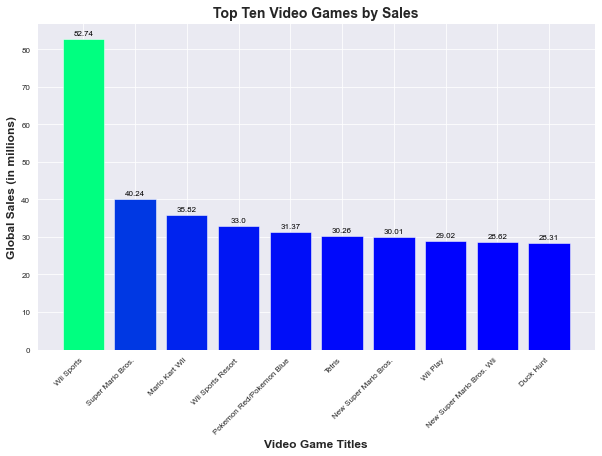

In [6]:
#rows with the top ten global sales
top_ten = data.nlargest(10, 'Global_Sales')

#set figure size
fig, ax = plt.subplots(figsize=(10, 6))

#define our x and y variable
x = top_ten['Name']
y = top_ten['Global_Sales']

#define our colormap
cmap = plt.colormaps.get_cmap('winter')                    
norm = mcolors.Normalize(vmin=y.min(), vmax=y.max())       
colors = cmap(norm(y))                                     

#create bar chart
ax.bar(x=x, height=y, color=colors)

#add value labels to each bar
for i, v in enumerate(y):
    ax.text(i, v + 1, str(v), ha='center', color="black", fontsize=8)

# set chart title and axis titles
ax.set_title('Top Ten Video Games by Sales', fontweight = "bold", fontsize= 14)
ax.set_xlabel('Video Game Titles', fontweight = "bold", fontsize= 12)
ax.set_ylabel('Global Sales (in millions)', fontweight = "bold", fontsize= 12)

#format axis ticks
plt.xticks(x, rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the chart
plt.show()

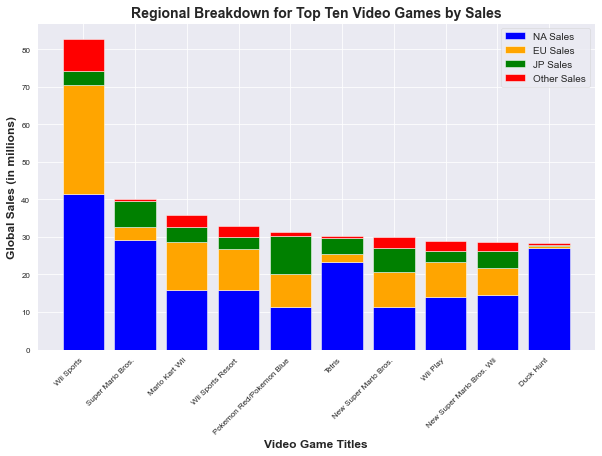

In [7]:
#extract our x and four y variables (sales from each region) from our top_ten video games
x = top_ten['Name']
y1 = top_ten["NA_Sales"]
y2 = top_ten["EU_Sales"]
y3 = top_ten["JP_Sales"]
y4 = top_ten["Other_Sales"]

#define figure size
fig, ax = plt.subplots(figsize=(10, 6))

#create the stack bar chart
ax.bar(x, y1, label='NA Sales', color='blue')
ax.bar(x, y2, label='EU Sales', color='orange', bottom=y1)
ax.bar(x, y3, label='JP Sales', color='green', bottom=y1+y2)
ax.bar(x, y4, label='Other Sales', color='red', bottom=y1+y2+y3)
#set the title, axis labels, and legend
ax.set_title('Regional Breakdown for Top Ten Video Games by Sales', fontweight = "bold", fontsize= 14)
ax.set_xlabel('Video Game Titles', fontweight = "bold", fontsize= 12)
ax.set_ylabel('Global Sales (in millions)', fontweight = "bold", fontsize= 12)
ax.legend()

#format axis ticks
plt.xticks(x, rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the chart
plt.show()

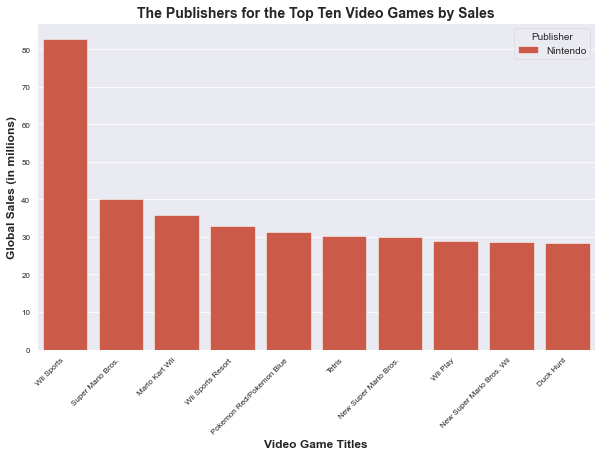

In [8]:
#define figure size
fig, ax = plt.subplots(figsize=(10, 6))

#seaborn to create barplot
ax = sns.barplot(data=top_ten, x="Name", y="Global_Sales", hue="Publisher", dodge=False)

#set the title, axis labels
ax.set_title('The Publishers for the Top Ten Video Games by Sales', fontweight = "bold", fontsize= 14)
ax.set_xlabel('Video Game Titles', fontweight = "bold", fontsize= 12)
ax.set_ylabel('Global Sales (in millions)', fontweight = "bold", fontsize= 12)

#format x and y ticks
plt.xticks(rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the chart
plt.show()

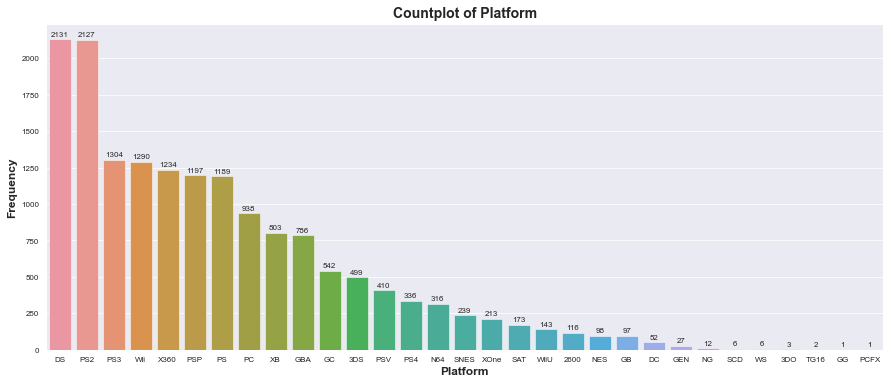

In [9]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#build frequency series to order the countplot
platform_freq = data['Platform'].value_counts()

#build countplot
ax = sns.countplot(data=data, x="Platform", order=platform_freq.index)

# Add count labels to the bars
for p in ax.patches:                                                   #ax.patches returns a list of all the graphical elements (which are the bars)
    ax.annotate(int(p.get_height()),           
#display the value as the height of each bar (frequency)
                (p.get_x() + p.get_width() / 2., p.get_height()),      #xy coordinate for the point annotated (not where the text is located)
                ha = 'center',                                         #horizontal alignmet
                va = 'center',                                         #vertical alignment
                xytext = (0, 5),                                       #the location of the text annotation 
                textcoords = 'offset points',                          #set text position to be offset from the xy coordinate
                fontsize = 8)                                          #fontsize                

# Set the axis labels and title
plt.xlabel('Platform', fontweight="bold", fontsize=12)
plt.ylabel('Frequency', fontweight="bold", fontsize=12)
plt.title('Countplot of Platform', fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#display the chart
plt.show()                
                

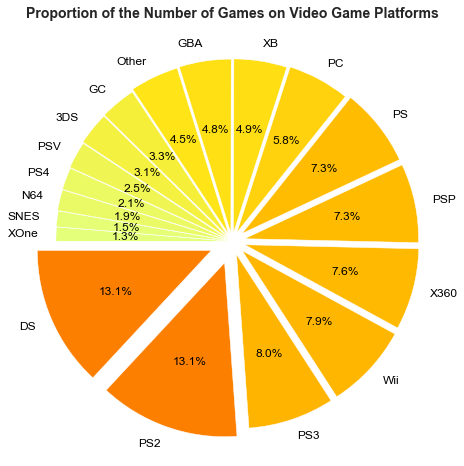

In [10]:
#define figure size
fig = plt.figure(figsize=(12, 8))

#set a threshold for collapsing small categories
threshold = 200

#collapse small categories into a single group
small_categories = platform_freq[platform_freq < threshold]
platform_freq['Other'] = platform_freq[small_categories.index].sum()
platform_freq.drop(small_categories.index, inplace=True)

#sort the values of the platform series such that the new `Other` category is placed in order
platform_freq = platform_freq.sort_values()

#calculate the proportions of each platform
proportions = platform_freq / platform_freq.sum()
#define colormap based on proportions
cmap = plt.colormaps.get_cmap('Wistia')
norm = mcolors.Normalize(vmin=proportions.min(), vmax=proportions.max())
colors = cmap(norm(proportions))

#create a pie chart
plt.pie(platform_freq,                                              #pie chart for platform_freq
        labels=platform_freq.index,                                 #set the label as the index of platform_freq
        autopct='%1.1f%%',                                          #format the label as a percentage
        explode = proportions,                                      #set the degree of explode to each pie's proportion
        colors = colors,                                            #set the color of each pie to the cmap defined above
        textprops={'color': "Black", 'fontsize': 12}, 
#format label
        startangle=180, counterclock=False)                         #define the starting point and direction of the pie

#set the title
plt.title('Proportion of the Number of Games on Video Game Platforms', fontweight="bold", fontsize=14)

#customize the plot using Seaborn
sns.set_style('white')

#display the chart
plt.show()        

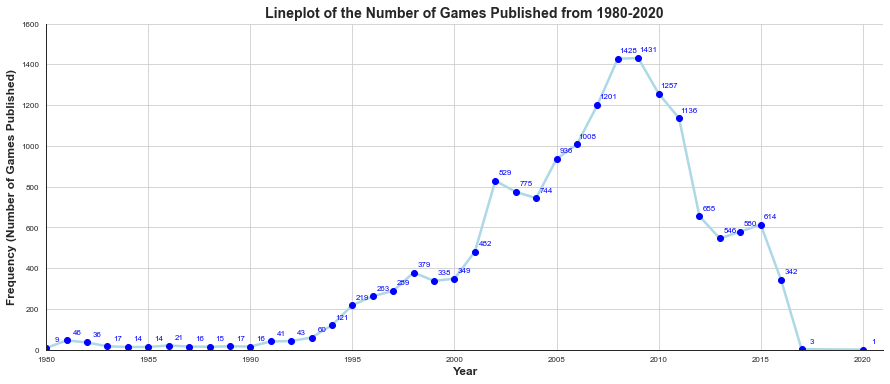

In [16]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#set seaborn style as white
sns.set_style("white")

#set up series for frequency of each Year
year = data["Year"].value_counts()

#build line plot
ax = sns.lineplot(x=year.index, y=year, lw=2.5, color="lightblue")
#add marker (the dots) and label 
for i, (x_coor, y_coor) in enumerate(year.items()):         
    plt.plot(x_coor, y_coor, marker='o', color='blue')      
    plt.annotate(y_coor,
                 xy=(x_coor, y_coor),                       
                 xytext=(x_coor+0.5, y_coor+40),            
                 fontsize=8,                                
                 color='blue',                              
                 ha="center",                               
                 va="center")                               

#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 1600)

# Add labels and title
plt.xlabel("Year", fontweight="bold", fontsize=12)
plt.ylabel("Frequency (Number of Games Published)", fontweight="bold", fontsize=12)
plt.title("Lineplot of the Number of Games Published from 1980-2020", fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#turn on grid
plt.grid(True)

#display the figure
plt.show()

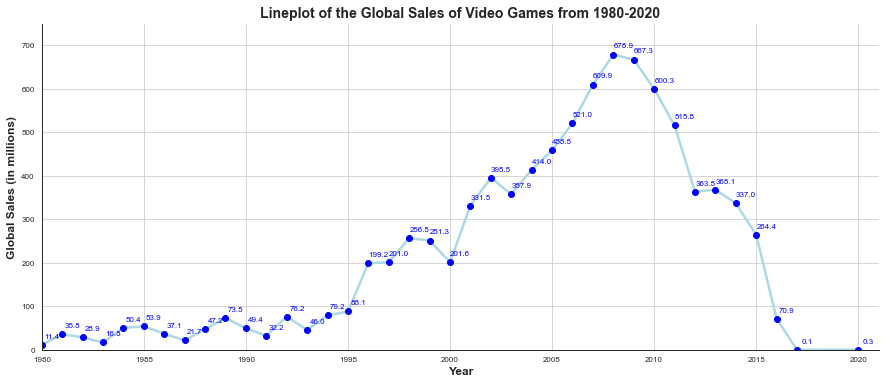

In [17]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#group Global_Sales by the Year
global_sales_by_year = data.groupby(['Year']).sum(numeric_only=True)["Global_Sales"]

#plot linegraph of Global_Sales
ax = sns.lineplot(x=global_sales_by_year.index, y=global_sales_by_year, lw=2.5, color="lightblue")

#add marker (the dots) and label 
for i, (x_coor, y_coor) in enumerate(global_sales_by_year.items()):
    plt.plot(x_coor, y_coor, marker='o', color='blue')
    plt.annotate(format(y_coor, '.1f'), 
                 xy=(x_coor, y_coor), 
                 xytext=(x_coor+0.5, y_coor+20), fontsize=8, 
                 color='blue', 
                 ha="center", 
                 va="center")
    
#retain the bottom and left spine to create x and y axis
sns.despine(left=False, bottom=False)

#set limits for x and y values
plt.xlim(1980, 2021)
plt.ylim(0, 750)

# Add labels and title
plt.xlabel("Year", fontweight="bold", fontsize=12)
plt.ylabel("Global Sales (in millions)", fontweight="bold", fontsize=12)
plt.title("Lineplot of the Global Sales of Video Games from 1980-2020", fontweight="bold", fontsize=14)
#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#turn on grid
plt.grid(True)

#display the plot
plt.show()

In [18]:
#merge year and global_sales_by_year
df = pd.merge(year, global_sales_by_year, right_index = True, left_index = True)
df.head()

,count,Global_Sales
Year,,
2009.0,1431,667.30
2008.0,1428,678.90
2010.0,1257,600.29
2007.0,1201,609.92
2011.0,1136,515.80


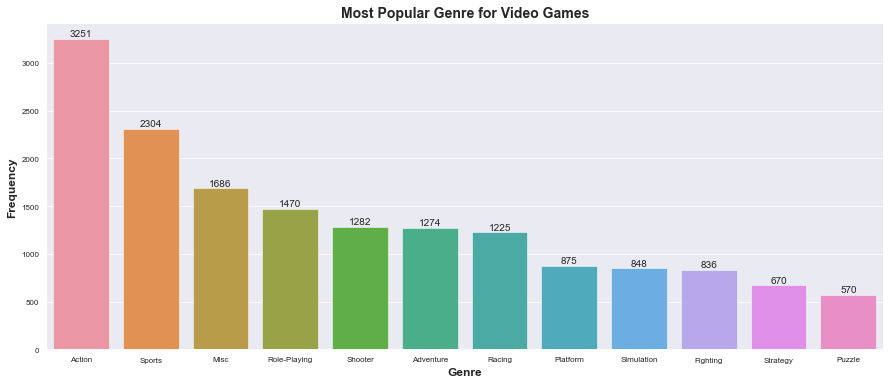

In [20]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#set seaborn style back to darkgrid
sns.set_style("darkgrid")

#genre frequency series
genre_freq = data['Genre'].value_counts()

#plot count plot and order in descending order
ax = sns.countplot(data=data, x="Genre", order=genre_freq.index)

#add count labels to the bars
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height() - 50), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize = 10)

# st the axis labels and title
plt.xlabel('Genre', fontweight="bold", fontsize=12)
plt.ylabel('Frequency', fontweight="bold", fontsize=12)
plt.title('Most Popular Genre for Video Games', fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

#display the plot
plt.show()

In [ ]:
#define figure size
fig = plt.figure(figsize=(15, 6))

#publisher frequency series
publisher_freq = data['Publisher'].value_counts()

#set a threshold for collapsing small categories
threshold = 50

#collapse small categories into a single group
small_categories = publisher_freq[publisher_freq < threshold]
publisher_freq['Other'] = publisher_freq[small_categories.index].sum()
publisher_freq.drop(small_categories.index, inplace=True)

#sort the series so that 'Other' is placed in right order
publisher_freq = publisher_freq.sort_values(ascending=False)
#plot the count plot in order
ax = sns.barplot(data=data, x=publisher_freq.index, y=publisher_freq.values, order=publisher_freq.index)

# Add count labels to the bars
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height() - 50), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize = 8)

# Set the axis labels and title
plt.xlabel('Publisher', fontweight="bold", fontsize=12)
plt.ylabel('Frequency (Number of Games Published)', fontweight="b
           old", fontsize=12)
plt.title('Number of Games Published by Publisher', fontweight="bold", fontsize=14)

#format x and y ticks
plt.xticks(rotation=45, fontsize=8, ha="right")
plt.yticks(fontsize=8)

#display the plot
plt.show()